# COGS 108 - Final Project 

# Overview

*Fill in your overview here*

# Names

- Steven Tran
- Chong Gu
- Sarah Youn
- Zefeng Xue
- Kuanghanying Zhao


#### Group Members IDs

- A13950948
- A14464757
- A########
- A########
- A14698283

# Research Question

How large is the gender wage gap between men and women within the tech industry? And which gender, on average, earns more whilst having similar educational backgrounds?

## Background and Prior Work

The gender wage gap has long been an issue in the United States. Recent research suggests that the wage gap has narrowed between men and women since the 1980s, but has changed little within the last 10 years.. While the number of women in the tech industry is rising, females are still largely considered to be part of the minority, and continue to make up less than 20% of the total number of employees at tech companies. Given this information, we are curious as to whether or not a wage gap exists in the tech industry, and if so, how large that wage gap is. 

This topic is of interest to our group because we all have an interest in technology, and many of us plan to work or be involved in the tech industry in some way in the future. Furthermore, technology continues to become more and more important in our daily lives and affects society and the way we live. As such, we believe that more women should be encouraged to pursue tech careers to promote innovation and, in doing so, be paid equally to men.

References (include links):
- 1) Facts about the gender pay gap: https://www.pewresearch.org/fact-tank/2019/03/22/gender-pay-gap-facts/
- 2) Women in tech statistics: https://smallbiztrends.com/2018/03/women-in-technology-statistics.html


# Hypothesis


In recent years, it seems that the presence of women within the tech industry, specifically in software engineering, has grown significantly. For years, we have heard that women are paid less than men for working the same jobs. We are hypothesizing that this is true for the tech industry, but that the gap is not extremely significant.

# Dataset(s)

*Fill in your dataset information here*
https://gist.github.com/nk412/38e131f55422a3b7422c6f50940a7489 
The data for our first dataset is from people in the tech industry (mainly software engineering type jobs) with 3700 entries and 12 variables. This data seems to be from a self reported Google Form. There seems to be significantly more males on this form than females, which might skew our findings.

https://github.com/HackathonHackers/data/blob/master/notebooks/fall-2015-salary.csv
This data has 161 entries and 27 different variables. The dataset is smaller than our first one but does seem a lot more well rounded in terms of distribution of genders and educational levels.

https://www.kaggle.com/kaggle/sf-salaries
This dataset shows salary information for multiple job titles in the San Francisco area. We plan to only look at the entries with job positions with a Software Engineer title or similar.

We plan to aggregate all of our data and merge it into one singular csv file. This will be easy to do since the current data we have share multiple similar variables. Because our data includes more data on males in the tech industry than females, we plan to look for more data sets to more accurately represent the female population.


(Copy this information for each dataset)
- Dataset Name:
- Link to the dataset:
- Number of observations:

1-2 sentences describing each dataset. 

If you plan to use multiple datasets, add 1-2 sentences about how you plan to combine these datasets.

# Setup

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import scipy.stats as stats

# Data Cleaning

Describe your data cleaning steps here.

Our goals for cleaning the data 
- [ ] The smaller dataset does not have an annualized salary column. It does, however, have a salary and payment frequency. We want to take that salary value and multiply it by the frequency to get an annualized salary.
- [ ] We want to combine our two datasets by matching all of the similar columns.
- [ ] 

In [19]:
#import datasets
df_sal1 = pd.read_csv('salaries.csv')
df_sal2 = pd.read_csv('fall-2015-salary.csv')

#dropping unused columns
df_sal1 = df_sal1.drop(['Timestamp', 'Employer', 'Years at Employer', 'Years of Experience', 'Annual Stock Value/Bonus', 'Additional Comments'], axis=1)
df_sal2 = df_sal2.drop(['Degree Level', 'Last Year of College', 'Timestamp', 'Company Name', 'Position Title', 'Base Salary', 'Salary Frequency', 'Housing Stipend', 'Stock Bonuses/Benefits', 'Stock Vesting Schedule Details', 'Additional Benefits', 'Did You Negotiate the Offer?', 'Did You Accept the Offer?', 'Time Frame From First Interview Invitation to Offer in Weeks', 'Last School Attended', 'Major', 'Additional Information', 'Monthly Salary', 'Annualized Recurring Renumeration (inc. stock)', 'Recurring Renumeration per Month', 'Total First Year Annualized Renumeration(including Signon & Relocation)'], axis=1)

df_sal1 = df_sal1.dropna(axis = 0, how = 'any')
df_sal2 = df_sal2.dropna(axis = 0, how = 'any')

df_sal2 = df_sal2.rename(index=str, columns={'Sex': 'Gender', 'Bonuses per Year': 'Annual Bonus', 'Annualized Salary': 'Annual Base Pay'})
df_sal1 = df_sal1.rename(index=str, columns={'Job Title': 'Position Type'})

df_append = df_sal1.append(df_sal2, sort = True)



In [20]:
for index, row in df_append.iterrows():
    c = row['Annual Base Pay']
    c = c.lower()
    c = c.replace('k', '000')
    df_append.loc[index, 'Annual Base Pay'] = c
    
    if (len(c) > 0 and c[0] == '-'):
        df_append.loc[index, 'Annual Base Pay'] = np.nan
        
    if c.find('hr') != -1 or c.find('hour') != -1:
        tempint = re.sub('[^0-9]','', c)
        tempint = tempint * 2080
        if int(tempint) > 10000000:
            df_append.loc[index, 'Annual Base Pay'] = np.nan
        else:
            c = str(tempint)
            df_append.loc[index, 'Annual Base Pay'] = c
        
    if c.find('≈') != -1:
        df_append.loc[index, 'Annual Base Pay'] = c[c.find('≈'): int(len(c))]
        
    if not c.isdigit():
        tempint = re.sub('[^0-9]','', c)
        df_append.loc[index, 'Annual Base Pay'] = str(tempint)

for index, row in df_append.iterrows():
    c = row['Annual Bonus']
    c = c.lower()
    c = c.replace('k', '000')
    df_append.loc[index, 'Annual Bonus'] = c
    
    if (len(c) > 0 and c[0] == '-'):
        df_append.loc[index, 'Annual Bonus'] = np.nan
        
    if c.find('hr') != -1 or c.find('hour') != -1:
        tempint = re.sub('[^0-9]','', c)
        tempint = tempint * 2080
        if int(tempint) > 10000000:
            df_append.loc[index, 'Annual Bonus'] = np.nan
        else:
            c = str(tempint)
            df_append.loc[index, 'Annual Bonus'] = c
        
    if c.find('≈') != -1:
        df_append.loc[index, 'Annual Bonus'] = c[c.find('≈'): int(len(c))]
        
    if not c.isdigit():
        tempint = re.sub('[^0-9]','', c)
        df_append.loc[index, 'Annual Bonus'] = str(tempint)
        
for index, row in df_append.iterrows():
    c = row['Signing Bonus']
    c = c.lower()
    c = c.replace('k', '000')
    df_append.loc[index, 'Signing Bonus'] = c
    
    if (len(c) > 0 and c[0] == '-'):
        df_append.loc[index, 'Signing Bonus'] = np.nan
        
    if c.find('hr') != -1 or c.find('hour') != -1:
        tempint = re.sub('[^0-9]','', c)
        tempint = tempint * 2080
        if int(tempint) > 10000000:
            df_append.loc[index, 'Signing Bonus'] = np.nan
        else:
            c = str(tempint)
            df_append.loc[index, 'Signing Bonus'] = c
        
    if c.find('≈') != -1:
        df_append.loc[index, 'Signing Bonus'] = c[c.find('≈'): int(len(c))]
        
    if not c.isdigit():
        tempint = re.sub('[^0-9]','', c)
        df_append.loc[index, 'Signing Bonus'] = str(tempint)

df_append = df_append.dropna(axis = 0, how = 'any')

In [21]:
# Convert the type of Annual Base Pay, Annual Bonus and Sigin Bonus from Strings into Integers 
df_append['Annual Base Pay'] = pd.to_numeric(df_append['Annual Base Pay'], errors='coerce')
df_append['Annual Bonus'] = pd.to_numeric(df_append['Annual Bonus'], errors='coerce')
df_append['Signing Bonus'] = pd.to_numeric(df_append['Signing Bonus'], errors='coerce')
df_append = df_append[df_append['Annual Base Pay'] < 1000000] 
df_append = df_append[df_append['Annual Base Pay'] > 10000] 
df_append = df_append[df_append['Annual Bonus'] < 750000] 
df_append = df_append[df_append['Signing Bonus'] < 1000000] 

In [22]:
print (df_append)

     Annual Base Pay  Annual Bonus                  Gender  \
1           125000.0           0.0                    Male   
2            83000.0        5000.0                    Male   
4            86000.0        6000.0                    Male   
6           105000.0        8500.0                    Male   
9            90500.0           0.0                    Male   
12          110000.0        7000.0                    Male   
14           40000.0         500.0                    Male   
16           45000.0        1500.0                    Male   
17          135000.0           0.0                    Male   
21          105000.0       47000.0                    Male   
22           95000.0           0.0                    Male   
23           80000.0           0.0                    Male   
24          120000.0        6000.0                    Male   
25           78000.0           0.0                    Male   
28          115000.0           0.0                    Male   
29      

# Data Analysis & Results

Include cells that describe the steps in your data analysis.

In [23]:
## YOUR CODE HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION

## Bar Plots 
Barplots show us the count of values within a single categorical variable.

### Gender
This barplot is used to find the proportion of males to females within our dataset.

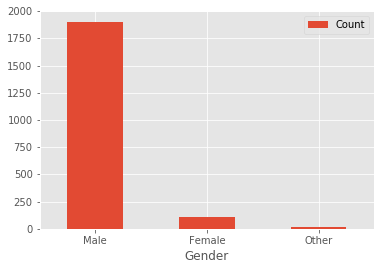

In [24]:
genderCol = df_append['Gender']
numMale = 0
numFemale = 0
numOther = 0

for x in genderCol:
    if x == 'Male':
        numMale = numMale + 1
    elif x == 'Female':
        numFemale = numFemale + 1
    else:
        numOther = numOther + 1

plotDf = pd.DataFrame({'Gender':['Male', 'Female', 'Other'], 'Count':[numMale, numFemale, numOther]})
barPlot = plotDf.plot.bar(x='Gender', y='Count', rot=0)


## Box Plots
Box plots summaries a quantitative variable broken down by a categorical variable.

### Gender vs. Annualized Salary 
We want to analyze annualized salary(quantitative variable) across genders(categorical variable) to see which gender has a higher annualized salary.

In [25]:
# Build a new data frame whose gender only contains female and male
df_box_plots_female = df_append.copy()
df_box_plots_male = df_append.copy()
df_box_plots_female = df_box_plots_female[df_box_plots_female['Gender'] == 'Female']
df_box_plots_male = df_box_plots_male[df_box_plots_male['Gender'] == 'Male']
df_box_plots = df_box_plots_female.append(df_box_plots_male, sort = True)

# Show mean and median of female's and male's annualized salary
print("Mean of female's annualized salary: ", df_box_plots_female['Annual Base Pay'].mean())
print("Mean of male's annualized salary: ",df_box_plots_male['Annual Base Pay'].mean())
print("Median of female's annualized salary: ",df_box_plots_female['Annual Base Pay'].median())
print("Median of male's annualized salary: ",df_box_plots_male['Annual Base Pay'].median())

df_box_plots = df_box_plots[df_box_plots['Annual Base Pay'] < 300000] 

Mean of female's annualized salary:  112477.85046728973
Mean of male's annualized salary:  103138.98003152916
Median of female's annualized salary:  92000.0
Median of male's annualized salary:  96000.0


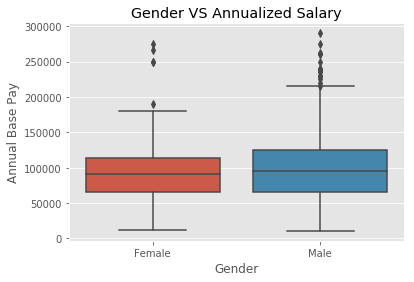

In [26]:
# Generate a boxplot
sns.boxplot(x = 'Gender', y = 'Annual Base Pay', data = df_box_plots)
ax = plt.gca()
ax.set_title('Gender VS Annualized Salary')
ax.set_ylabel('Annual Base Pay')
ax.set_xlabel('Gender');

# Scatter Plot

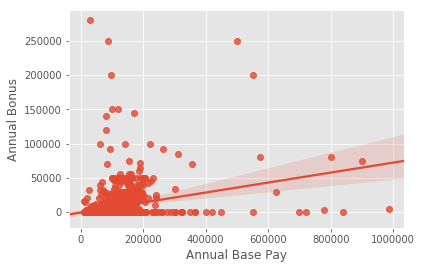

In [34]:
##Male ABS vs AB

male_only = df_append[df_append['Gender'] == 'Male'] 
sns.regplot(male_only['Annual Base Pay'], male_only['Annual Bonus'])
plt.show()


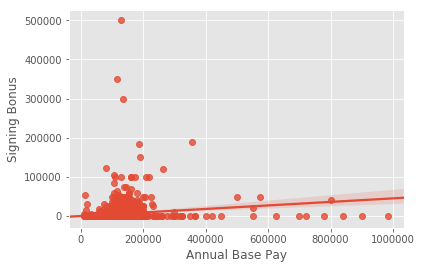

In [35]:
#Male ABS vs SB

sns.regplot(male_only['Annual Base Pay'], male_only['Signing Bonus'])
plt.show()


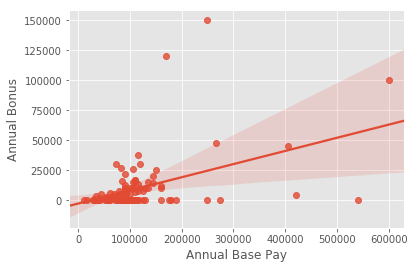

In [36]:
#Female ABS vs AB

female_only = df_append[df_append['Gender'] == 'Female'] 
sns.regplot(female_only['Annual Base Pay'], female_only['Annual Bonus'])
plt.show()


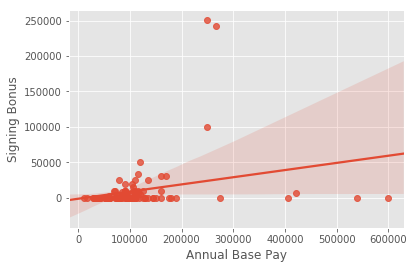

In [37]:
#Female ABS vs SB

sns.regplot(female_only['Annual Base Pay'], female_only['Signing Bonus'])
plt.show()


## Density Plot 
Density plots reveal information about a single quantitative variable.

In [ ]:
# Build a data frame for density plot of female's annual base salary
df_density_plots_female = df_append.copy()
df_density_plots_female = df_density_plots_female[df_density_plots_female['Gender'] == 'Female']
df_density_plots_female = df_density_plots_female.drop(columns = ['Annual Bonus', 'Location', 'Position Type', 'Signing Bonus'])
df_density_plots_female = df_density_plots_female[df_density_plots_female['Annual Base Pay'] < 300000] 

# Generate a density plot 
ax = sns.distplot(df_density_plots_female['Annual Base Pay'], bins= 20)
sns.despine()
ax.set_title('Female Annual Base Salary')
ax.set_ylabel('Count')
ax.set_xlabel('Annual Base Salary');

In [ ]:
# Build a data frame for density plot of male's annual base salary
df_density_plots_male = df_append.copy()
df_density_plots_male = df_density_plots_male[df_density_plots_male['Gender'] == 'Male']
df_density_plots_male = df_density_plots_male.drop(columns = ['Annual Bonus', 'Location', 'Position Type', 'Signing Bonus'])
df_density_plots_male = df_density_plots_male[df_density_plots_male['Annual Base Pay'] < 300000] 

# Generate a density plot 
ax = sns.distplot(df_density_plots_male['Annual Base Pay'], bins= 20)
sns.despine()
ax.set_title('Male Annual Base Salary')
ax.set_ylabel('Count')
ax.set_xlabel('Annual Base Salary');

### Annualized Salary
We are creating a density plot to investigate the distribution of salaries across all the people in our dataset. We seek to find ... from this plot.

## Segmented Bar Graph
A segmented bar graph compares multiple quantitative variables across a single categorical variable. 

### Gender vs. "Income"
"Income" consists of 3 quantitative variables: Annualized Salary, Signing Bonus, Other Bonuses. The reason we want to look at these 3 quantitative variables is to get a more holistic representation of the amount of money an individual is bringing home, because salary may not be the most accurate representation because a person make only make a $40,000 but have another $40,000 in bonuses/ other compensation.

# Ethics & Privacy

*Fill in your ethics & privacy discussion here*

# Conclusion & Discussion

*Fill in your discussion information here*